In [1]:
from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.WaveformAnalysis import Waveform
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os, glob, itertools
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 15

In [2]:
analysis_config = StruckAnalysisConfiguration.StruckAnalysisConfiguration()
parameters = '20200916_RnPoAlphaEffTest'
analysis_config.GetRunParametersFromFile('/g/g90/jacopod/software/TMSAnalysis/config/30th/Run_Parameters_Run30.xlsx',
                                         parameters)
analysis_config.GetChannelMapFromFile('/g/g90/jacopod/software/TMSAnalysis/config/30th/Channel_Map_Run30.xlsx',
                                         parameters)
sampling_time = analysis_config.run_parameters['Sampling Period [ns]']/1.e3
trigger_time = analysis_config.run_parameters['Pretrigger Length [samples]']
path_to_reduced = '/p/lustre1/jacopod/30th/'
!ls $path_to_reduced

20200911_OvernightBi207_AfterFilling
20200912_MorningNoise_PreRecirculation
20200915_Night_AfterFirstRnInjection
20200915_Night_Noise
20200916_Morning_Noise
20200916_Night_AfterSecondRnInjection
20200916_RnPoAlphaEffTest
20200917_Night_AfterThirdRnInjection
20200920_Rn220InParallel_RnPoTest
20200921_Afternoon_AfterFourthInjection
20200922_Afternoon_AfterFifthInjection
20200923_Afternoon_AfterSixthInjection
20200924_Afternoon_AfterSeventhInjection
20201207_alpha_sim
20210502_bipo_sim
20210512_207Bi_sim
config
selected_dataset


In [3]:
folder = '/p/lustre1/jacopod/30th/20200917_Night_AfterThirdRnInjection'
df = pd.read_pickle(folder + '/analysis_500ns_new_calib/reduced_added.p')

/p/lustre1/jacopod/30th/20200917_Night_AfterThirdRnInjection


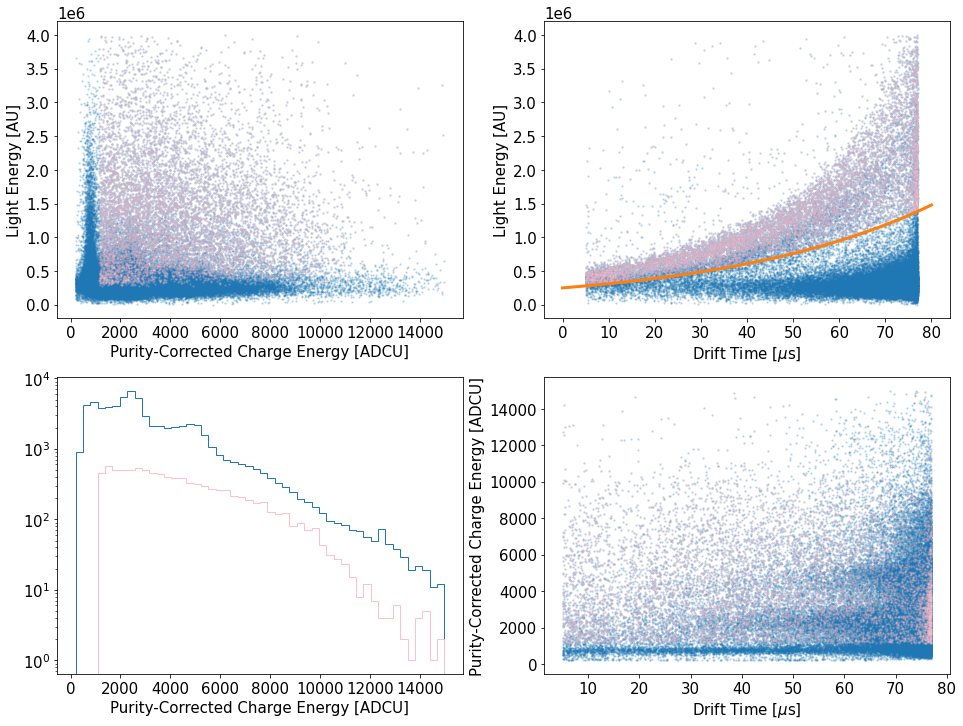

In [8]:
import matplotlib
matplotlib.use('Agg')
DriftTime = (df['TimeOfMaxChannel'] - trigger_time)*sampling_time
e_lifetime = 101.8
x_range = np.linspace(0,3,100)
drifttime = np.linspace(0,80,100)
df['Purity-Corrected Charge Energy'] = df['TotalTileEnergy']*np.exp(DriftTime/e_lifetime)
bipo_mask = (df['TotalSiPMEnergy']>500) & (df['TotalSiPMEnergy']<4000000) &\
(df['Purity-Corrected Charge Energy']<15000) & (df['Purity-Corrected Charge Energy']>200) &\
(DriftTime>5) & (DriftTime<77) &\
df['IsFull3D']
uniform_light = bipo_mask & (df['TotalSiPMEnergy']>250000*np.exp(DriftTime/45)) &\
(df['Purity-Corrected Charge Energy']>1150)
print(folder)
fig, ax = plt.subplots(2,2,figsize=(16,12))
ax[0,0].scatter(df['Purity-Corrected Charge Energy'][bipo_mask],\
              df['TotalSiPMEnergy'][bipo_mask],\
              s=2, alpha=0.2)
ax[0,0].scatter(df['Purity-Corrected Charge Energy'][uniform_light],\
              df['TotalSiPMEnergy'][uniform_light],\
              s=2, alpha=0.2,color='pink')
ax[0,0].set_xlabel('Purity-Corrected Charge Energy [ADCU]')
ax[0,0].set_ylabel('Light Energy [AU]')
ax[0,1].scatter(DriftTime[bipo_mask],\
              df['TotalSiPMEnergy'][bipo_mask],\
              s=2, alpha=0.2)
ax[0,1].scatter(DriftTime[uniform_light],\
              df['TotalSiPMEnergy'][uniform_light],\
              s=2, alpha=0.2,color='pink')
ax[0,1].plot(drifttime,250000*np.exp(drifttime/45),lw=3,color='C1')
ax[0,1].set_xlabel('Drift Time [$\mu$s]')
ax[0,1].set_ylabel('Light Energy [AU]')
_,bn,_ = ax[1,0].hist(df['Purity-Corrected Charge Energy'][bipo_mask], bins=50,log=True,histtype='step')
ax[1,0].hist(df['Purity-Corrected Charge Energy'][uniform_light], bins=bn,log=True,histtype='step',color='pink')
ax[1,0].set_xlabel('Purity-Corrected Charge Energy [ADCU]')
ax[1,1].scatter(DriftTime[bipo_mask], df['Purity-Corrected Charge Energy'][bipo_mask], s=2, alpha=0.2)
ax[1,1].scatter(DriftTime[uniform_light], df['Purity-Corrected Charge Energy'][uniform_light], s=2, alpha=0.2,color='pink')
ax[1,1].set_xlabel('Drift Time [$\mu$s]')
ax[1,1].set_ylabel('Purity-Corrected Charge Energy [ADCU]')
plt.show()

/p/lustre1/jacopod/30th/20200915_Night_AfterFirstRnInjection


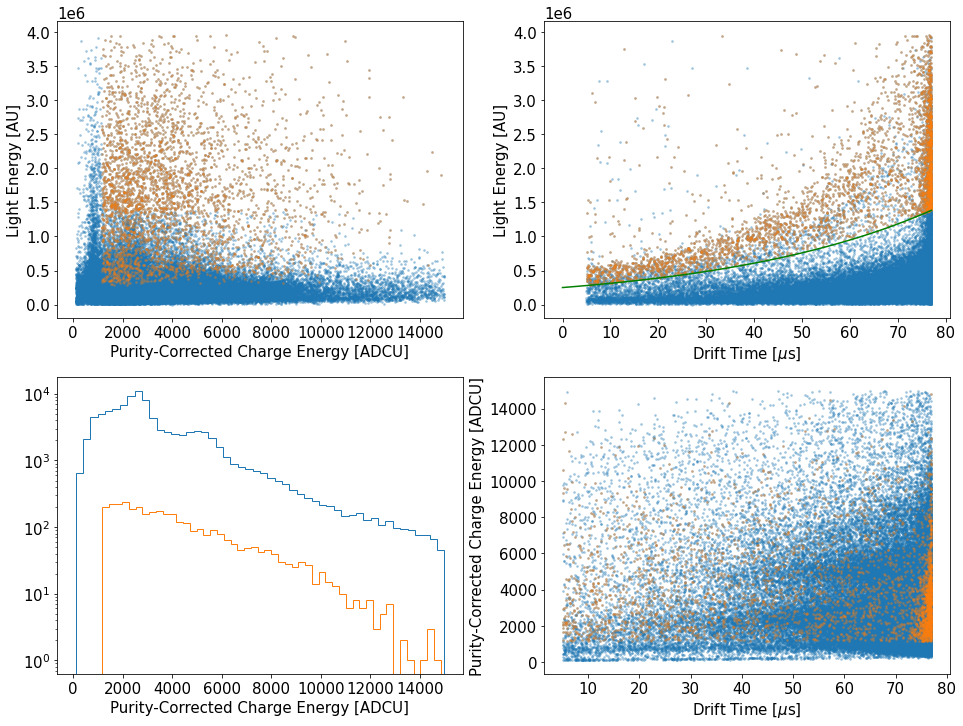

/p/lustre1/jacopod/30th/20200917_Night_AfterThirdRnInjection


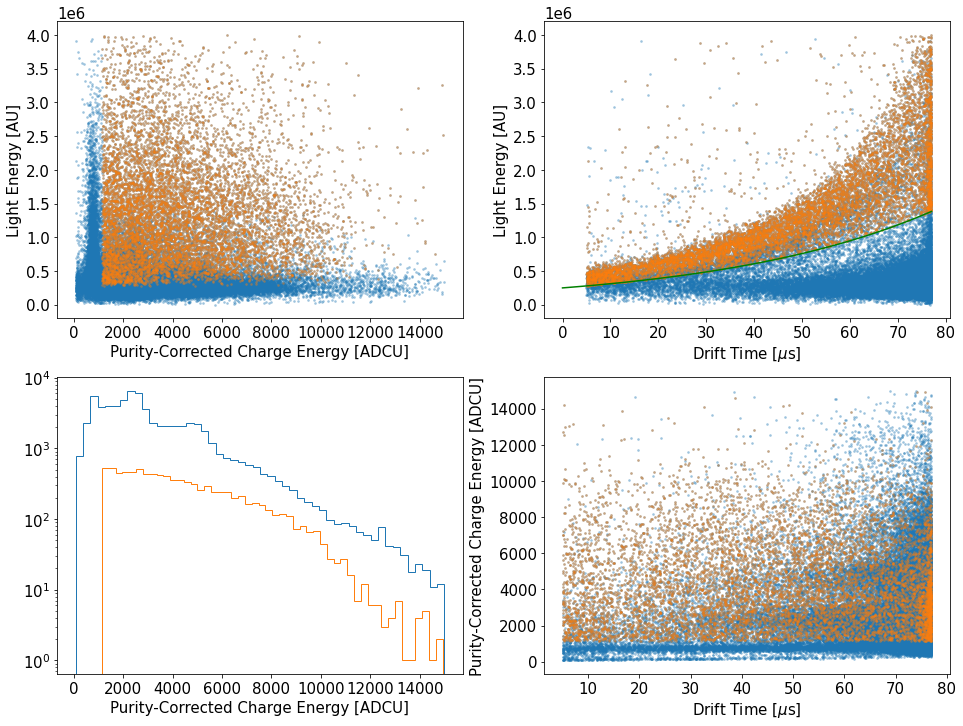

/p/lustre1/jacopod/30th/20200921_Afternoon_AfterFourthInjection


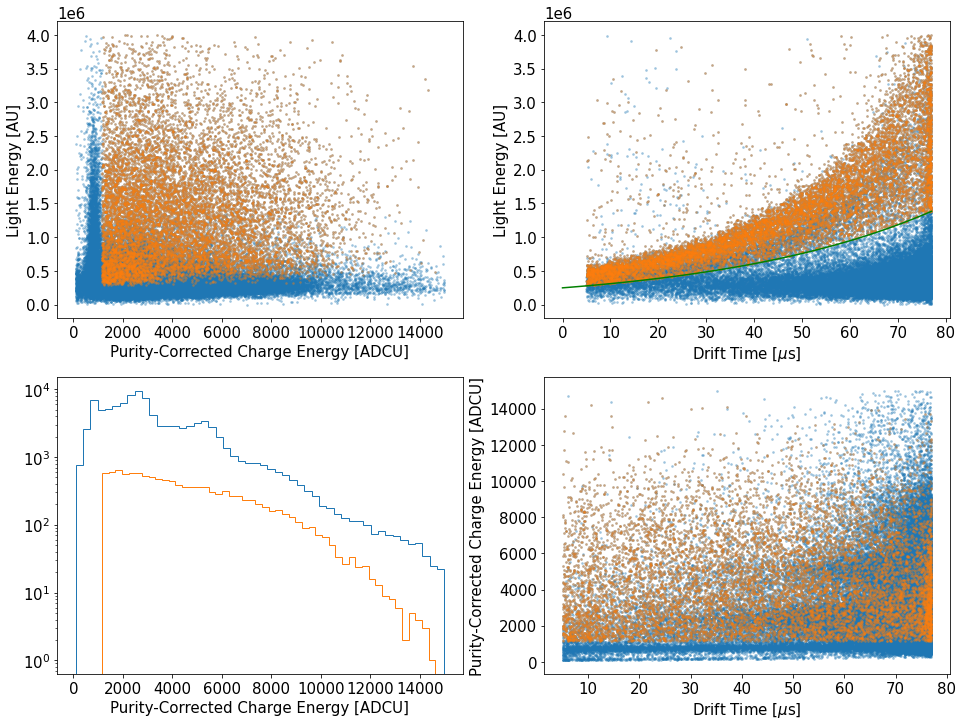

/p/lustre1/jacopod/30th/20200922_Afternoon_AfterFifthInjection


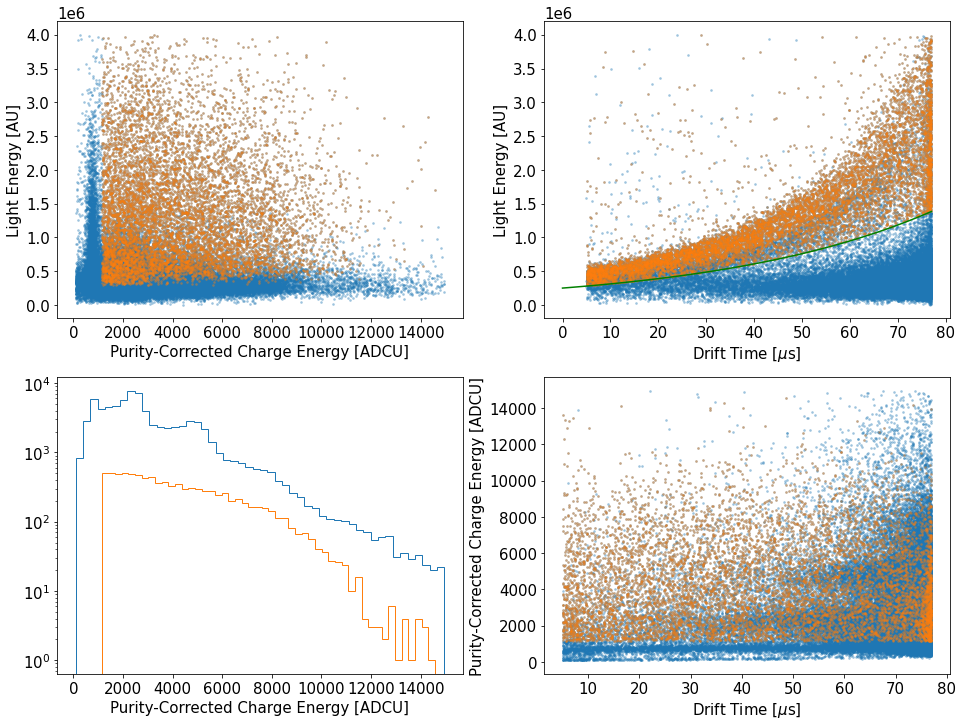

/p/lustre1/jacopod/30th/20200923_Afternoon_AfterSixthInjection


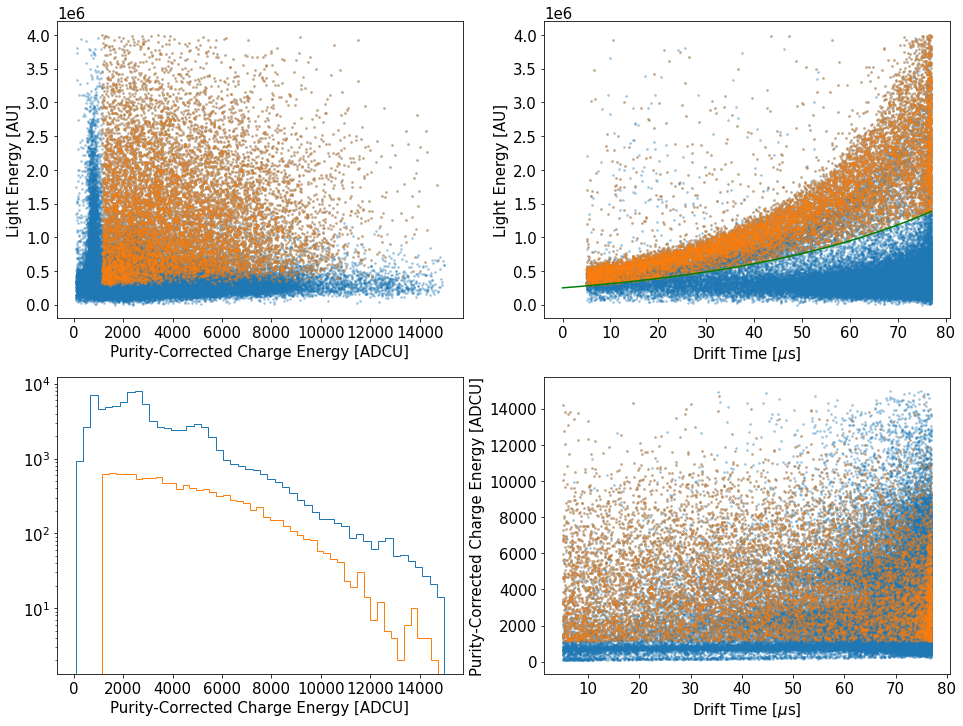

/p/lustre1/jacopod/30th/20200924_Afternoon_AfterSeventhInjection


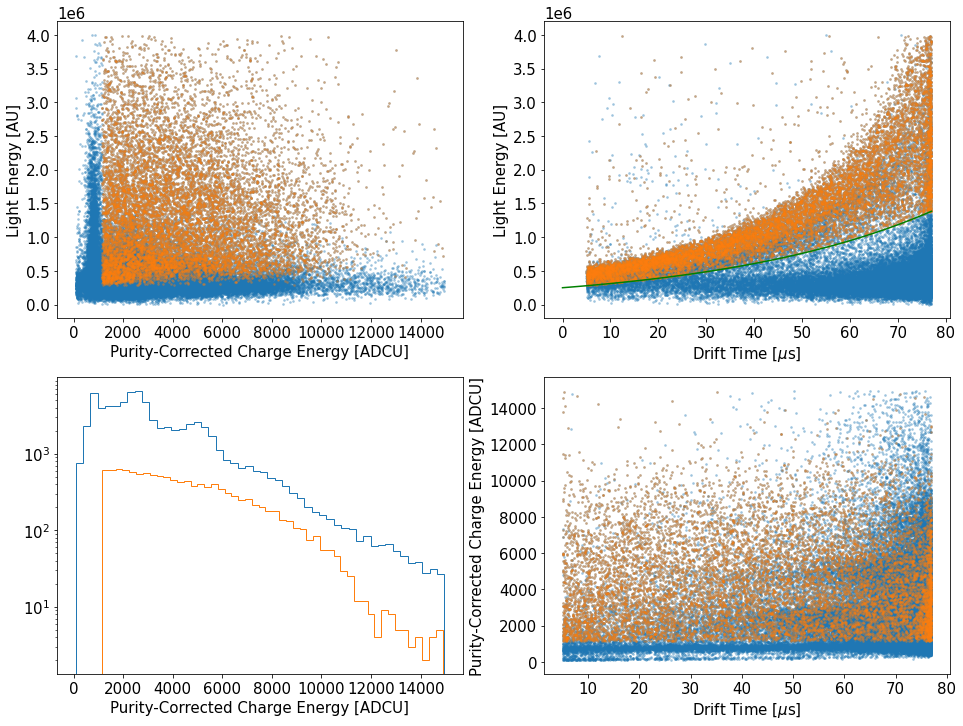

ChannelPositions
ChannelTypes
Cluster Drift Time
Cluster Energies
Cluster X-Pos
Cluster Y-Pos
Cluster Z-Pos
Event
File
IsFull3D
NumSiPMChannelsHit
NumTileChannelsHit
NumXTileChannelsHit
NumYTileChannelsHit
Number3DClusters
NumberOfClusters
SiPM 1-1 Baseline
SiPM 1-1 Baseline RMS
SiPM 1-1 Induced Charge
SiPM 1-1 Pulse Area
SiPM 1-1 Pulse Height
SiPM 1-1 Pulse Time
SiPM 1-1 T10
SiPM 1-1 T20
SiPM 1-1 T5
SiPM 1-1 T80
SiPM 1-1 T90
SiPM 1-2 Baseline
SiPM 1-2 Baseline RMS
SiPM 1-2 Induced Charge
SiPM 1-2 Pulse Area
SiPM 1-2 Pulse Height
SiPM 1-2 Pulse Time
SiPM 1-2 T10
SiPM 1-2 T20
SiPM 1-2 T5
SiPM 1-2 T80
SiPM 1-2 T90
SiPM 1-3 Baseline
SiPM 1-3 Baseline RMS
SiPM 1-3 Induced Charge
SiPM 1-3 Pulse Area
SiPM 1-3 Pulse Height
SiPM 1-3 Pulse Time
SiPM 1-3 T10
SiPM 1-3 T20
SiPM 1-3 T5
SiPM 1-3 T80
SiPM 1-3 T90
SiPM 1-4 Baseline
SiPM 1-4 Baseline RMS
SiPM 1-4 Induced Charge
SiPM 1-4 Pulse Area
SiPM 1-4 Pulse Height
SiPM 1-4 Pulse Time
SiPM 1-4 T10
SiPM 1-4 T20
SiPM 1-4 T5
SiPM 1-4 T80
SiPM 1-4 T90


In [38]:
e_lifetime = [94.0,101.8,88.7,100.2,95.1,93.5]
df_list = []
x_range = np.linspace(0,3,100)
drifttime = np.linspace(0,77,100)
i = 0
for folder in sorted(glob.glob(path_to_reduced+'20*')):
    dataset = folder.split('/')[-1]
    if not os.path.exists(folder + '/analysis_500ns_new_calib/reduced_added.p'):
        continue
    df = pd.read_pickle(folder + '/analysis_500ns_new_calib/reduced_added.p')
    DriftTime = (df['TimeOfMaxChannel'] - trigger_time)*sampling_time
    df['Purity-Corrected Charge Energy'] = df['TotalTileEnergy']*np.exp(DriftTime/e_lifetime[i])
    bipo_mask = (df['TotalSiPMEnergy']>500) & (df['TotalSiPMEnergy']<4000000) &\
    (df['Purity-Corrected Charge Energy']<15000) &\
    (DriftTime>5) & (DriftTime<77) &\
    df['IsFull3D']
    uniform_light = bipo_mask & (df['TotalSiPMEnergy']>250000*np.exp(DriftTime/45)) &\
    (df['Purity-Corrected Charge Energy']>1150)#(df['Purity-Corrected Charge Energy']>300) & 
    print(folder)
    fig, ax = plt.subplots(2,2,figsize=(16,12))
    ax[0,0].scatter(df['Purity-Corrected Charge Energy'][bipo_mask],\
                  df['TotalSiPMEnergy'][bipo_mask],\
                  s=3, alpha=0.3)
    ax[0,0].scatter(df['Purity-Corrected Charge Energy'][uniform_light],\
                  df['TotalSiPMEnergy'][uniform_light],\
                  s=3, alpha=0.3)
    ax[0,0].set_xlabel('Purity-Corrected Charge Energy [ADCU]')
    ax[0,0].set_ylabel('Light Energy [AU]')
    ax[0,1].scatter(DriftTime[bipo_mask],\
                  df['TotalSiPMEnergy'][bipo_mask],\
                  s=3, alpha=0.3)
    ax[0,1].scatter(DriftTime[uniform_light],\
                  df['TotalSiPMEnergy'][uniform_light],\
                  s=3, alpha=0.3)
    ax[0,1].plot(drifttime,250000*np.exp(drifttime/45),color='green')
    ax[0,1].set_xlabel('Drift Time [$\mu$s]')
    ax[0,1].set_ylabel('Light Energy [AU]')
    ax[1,0].hist(df['Purity-Corrected Charge Energy'][bipo_mask], bins=50,log=True,histtype='step')
    ax[1,0].hist(df['Purity-Corrected Charge Energy'][uniform_light], bins=50,log=True,histtype='step')
    ax[1,0].set_xlabel('Purity-Corrected Charge Energy [ADCU]')
    ax[1,1].scatter(DriftTime[bipo_mask], df['Purity-Corrected Charge Energy'][bipo_mask], s=3, alpha=0.3)
    ax[1,1].scatter(DriftTime[uniform_light], df['Purity-Corrected Charge Energy'][uniform_light], s=3, alpha=0.3)
    ax[1,1].set_xlabel('Drift Time [$\mu$s]')
    ax[1,1].set_ylabel('Purity-Corrected Charge Energy [ADCU]')
    i += 1
    plt.show()
    df_list.append(df[uniform_light])
bipo_rich = pd.concat(df_list,ignore_index=True)
bipo_rich.to_pickle(path_to_reduced+'selected_dataset/bipo_rich_500ns_improved.p')
cut_string = '5<DriftTime<77 & IsFull3D &\n TotalSiPMEnergy>250000*np.exp(DriftTime/45)) &\n Purity-Corrected Charge Energy>1150)'
with open(path_to_reduced+'selected_dataset/bipo_rich_500ns_improved_cut','w') as f:
    f.write(cut_string)
for k in df.keys():
    print(k)

In [ ]:
plt.hist(DriftTime[uniform_light],log=True)
plt.hist(DriftTime[uniform_light][(df['SiPM 1-3 T90']-df['SiPM 1-3 T10'])<0.7/sampling_time],log=True)

/g/g90/jacopod/uproot/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/g/g90/jacopod/uproot/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


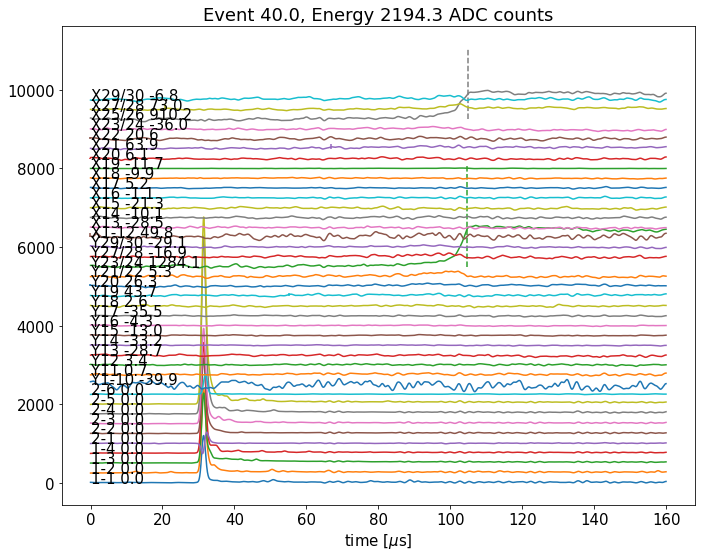

/g/g90/jacopod/uproot/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


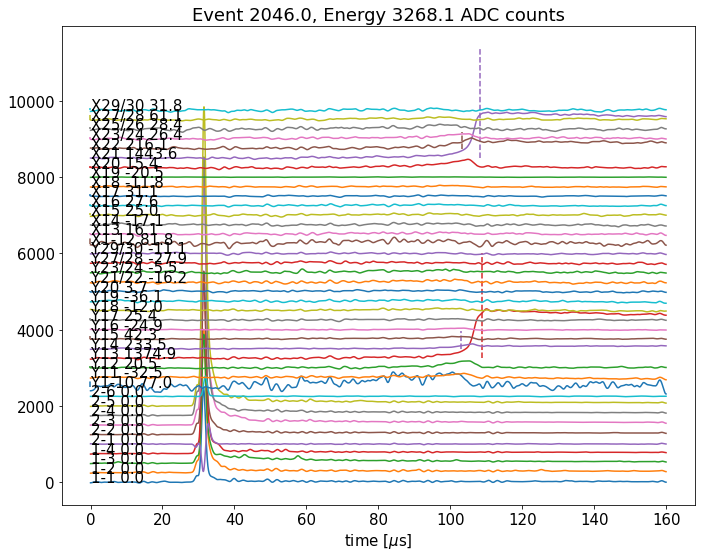

/g/g90/jacopod/uproot/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


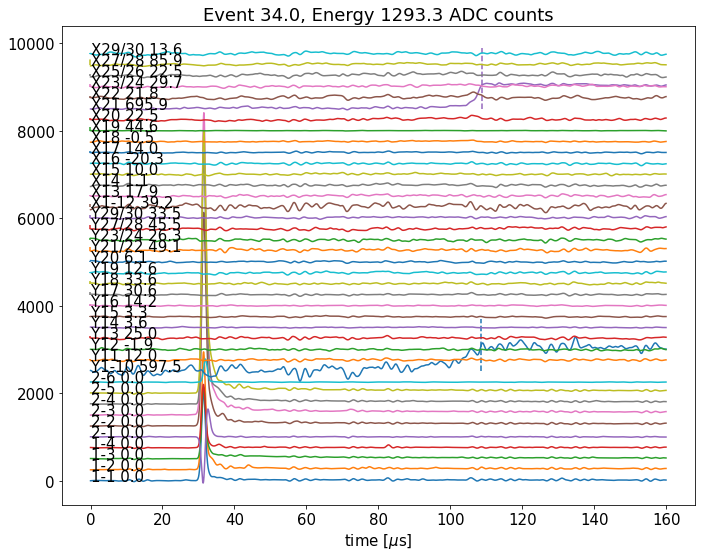

/g/g90/jacopod/uproot/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


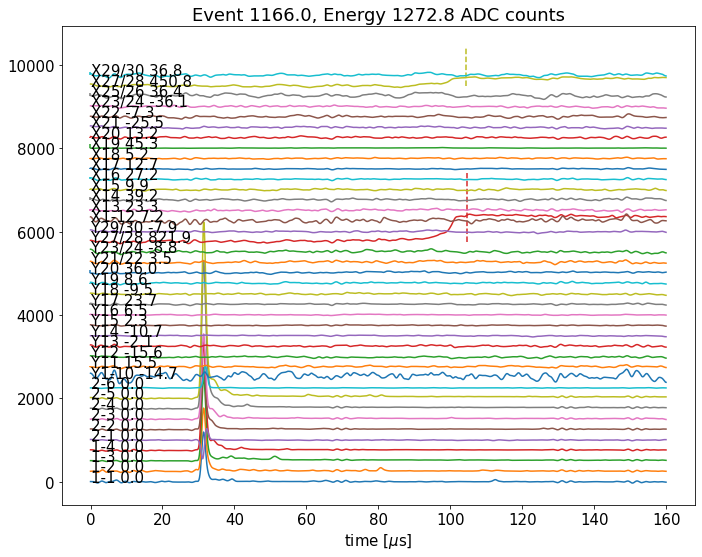

/g/g90/jacopod/uproot/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


KeyboardInterrupt: 

In [37]:
run_parameters_file = '/g/g90/jacopod/software/TMSAnalysis/config/30th/Run_Parameters_Run30.xlsx'
calibrations_file = '/g/g90/jacopod/software/TMSAnalysis/config/30th/Calibrations_Xe_Run30.csv'
channel_map_file = '/g/g90/jacopod/software/TMSAnalysis/config/30th/Channel_Map_Run30.xlsx'
for e in df[uniform_light][((df['SiPM 1-3 T90']-df['SiPM 1-3 T10'])>0.7/sampling_time)& (DriftTime>70)].index[:10]:               
    event = Waveform.Event('/p/lustre1/jacopod/30th/20200924_Afternoon_AfterSeventhInjection/analysis_500ns_new_calib/reduced_added.p',\
                           '/p/lustre1/jacopod/30th/20200924_Afternoon_AfterSeventhInjection/raw_data',\
                           e,\
                           run_parameters_file,\
                           calibrations_file,\
                           channel_map_file)

    event.smooth(0.5)
    plot = event.plot_event(True)
    plot.show()